### **Contents**
1. Import
2. Data Prepare
3. Model Prepare
4. Training Model
5. Visualize

## **1. Importing required libraries**

In [ ]:
import torch #PyTorch
from torch import nn ## Base class for all neural network
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.3.0+cu121'

##2. **Data Prepare**

In [ ]:
start  =10
end=110
step = 10

X = torch.arange(start, end,step, dtype=torch.float).unsqueeze(dim=1)
X

tensor([[ 10.],
        [ 20.],
        [ 30.],
        [ 40.],
        [ 50.],
        [ 60.],
        [ 70.],
        [ 80.],
        [ 90.],
        [100.]])

In [ ]:
y = 15 * X + 15
X,y

(tensor([[ 10.],
         [ 20.],
         [ 30.],
         [ 40.],
         [ 50.],
         [ 60.],
         [ 70.],
         [ 80.],
         [ 90.],
         [100.]]),
 tensor([[ 165.],
         [ 315.],
         [ 465.],
         [ 615.],
         [ 765.],
         [ 915.],
         [1065.],
         [1215.],
         [1365.],
         [1515.]]))

In [ ]:
data_split = int(0.8*len(X))
data_split

X_train, X_test = X[:data_split], X[data_split:]
y_train, y_test = y[:data_split], y[data_split:]

print(f"X_train:{X_train}| \nX_test:{X_test}")
print(f"y_train:{y_train} | \ny_test:{y_test}")

X_train:tensor([[10.],
        [20.],
        [30.],
        [40.],
        [50.],
        [60.],
        [70.],
        [80.]])| 
X_test:tensor([[ 90.],
        [100.]])
y_train:tensor([[ 165.],
        [ 315.],
        [ 465.],
        [ 615.],
        [ 765.],
        [ 915.],
        [1065.],
        [1215.]]) | 
y_test:tensor([[1365.],
        [1515.]])


In [ ]:
#Data_Visualization Plot

def data_plot(train_data=X_train,
              train_target=y_train,
              test_data=X_test,
              test_target=y_test,
              predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_target, c='b', s=4, label="Training Data")
  plt.scatter(test_data, test_target, c='g', s=4, label="Test Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="Predicted Data")
  plt.legend(prop={"size":14})

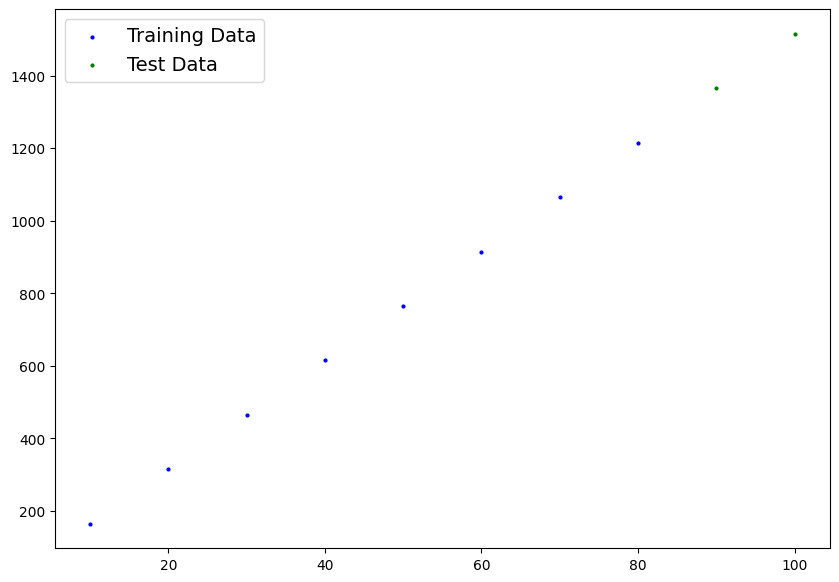

In [ ]:
data_plot()

## **3. Model Preparation**

In [ ]:
class SimpleLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad=True))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True))

  def forward(self,x):
    return self.weight * x + self.bias

In [ ]:
torch.manual_seed(42)
model_1 = SimpleLinearRegression()
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_1.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode(): # it disables gradient tracking and helps to access the model
  y_pred = model_1(X_test)
y_pred

tensor([[30.4309],
        [33.7978]])

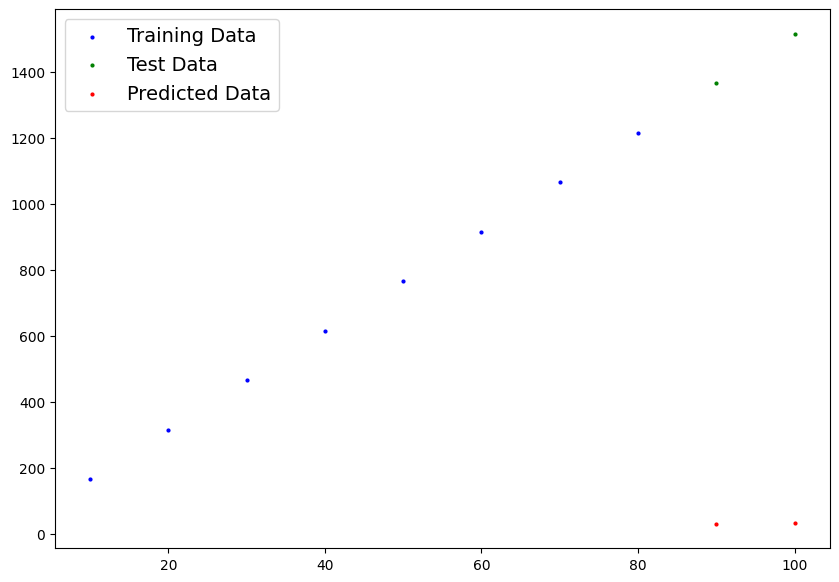

In [ ]:
data_plot(predictions=y_pred)

## **3. Training the Model**

###**3.1 Loss & Optimizer**

In [ ]:
#loss
loss_fun = nn.MSELoss()
#optimzier
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.00001)  #lr (0,1)

In [ ]:
model_1.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
epoches =100
epoch_count =[]
train_loss_count=[]
test_loss_count=[]
for epoch in range(epoches):
  epoch_count.append(epoch)
  #training loop
  #1. forward pass
  model_1.train() # declaring model starts training
  y_hat_pred = model_1(X_train)

  #2. loss calculate
  train_loss = loss_fun(y_hat_pred, y_train)
  train_loss_count.append(train_loss)

  #3. zero grad
  optimizer.zero_grad()
  #4. loss backward
  train_loss.backward()
  #5. optimizer step
  optimizer.step()

  #test loop
  model_1.eval()
  with torch.inference_mode():
    #1. forward pass
    test_hat_pred = model_1(X_test)

    #2. test loss calculate
    test_loss = loss_fun(test_hat_pred, y_test)
    test_loss_count.append(test_loss)

    # print(model_1.state_dict())
    # if epoch % 10 ==0:
    print(f"Epoch:{epoch} | Train Loss:{train_loss} | Test Loss:{test_loss}")

Epoch:0 | Train Loss:568128.875 | Test Loss:1788544.0
Epoch:1 | Train Loss:511644.6875 | Test Loss:1609424.0
Epoch:2 | Train Loss:460776.65625 | Test Loss:1448180.25
Epoch:3 | Train Loss:414966.375 | Test Loss:1303031.25
Epoch:4 | Train Loss:373711.03125 | Test Loss:1172374.0
Epoch:5 | Train Loss:336557.625 | Test Loss:1054764.375
Epoch:6 | Train Loss:303098.34375 | Test Loss:948902.25
Epoch:7 | Train Loss:272965.90625 | Test Loss:853616.75
Epoch:8 | Train Loss:245829.5 | Test Loss:767853.75
Epoch:9 | Train Loss:221391.265625 | Test Loss:690664.0625
Epoch:10 | Train Loss:199382.890625 | Test Loss:621192.6875
Epoch:11 | Train Loss:179562.78125 | Test Loss:558670.0
Epoch:12 | Train Loss:161713.390625 | Test Loss:502403.125
Epoch:13 | Train Loss:145638.75 | Test Loss:451767.96875
Epoch:14 | Train Loss:131162.359375 | Test Loss:406202.75
Epoch:15 | Train Loss:118125.3828125 | Test Loss:365201.5
Epoch:16 | Train Loss:106384.65625 | Test Loss:328308.75
Epoch:17 | Train Loss:95811.2890625 | T

In [ ]:
model_1.state_dict()

OrderedDict([('weight', tensor([15.1783])), ('bias', tensor([0.3968]))])

In [ ]:
#checking new model with test data
with torch.inference_mode():
  y_new = model_1(X_test)
y_new

tensor([[1366.4457],
        [1518.2289]])

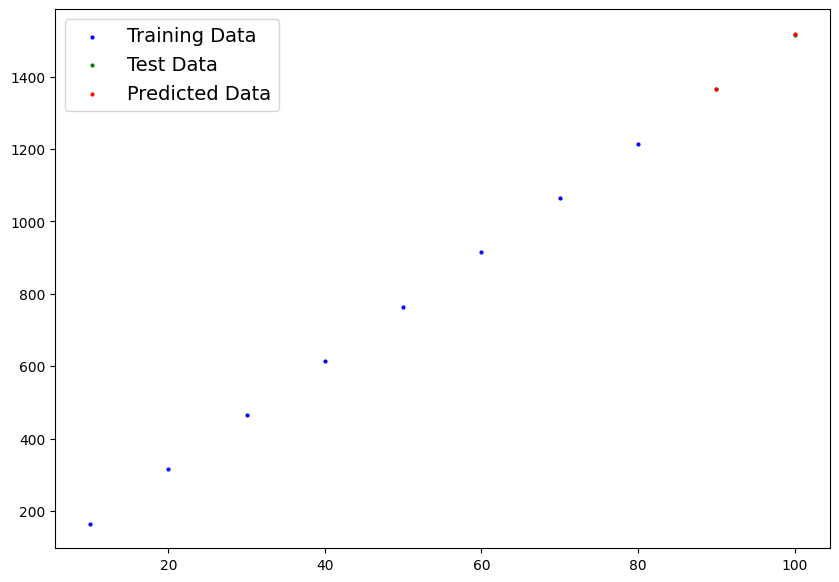

In [ ]:
# visualzing the prediction
data_plot(predictions=y_new)

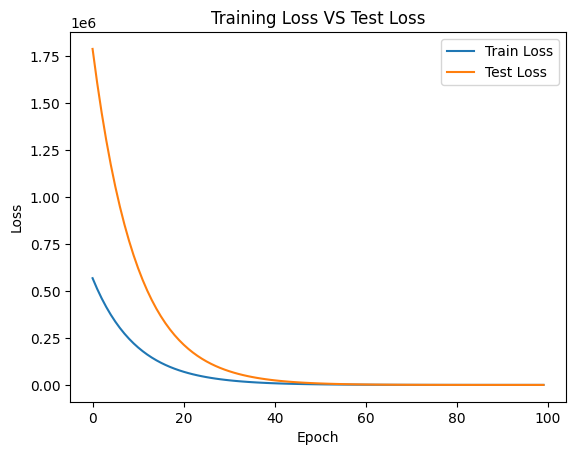

In [ ]:
# visualizing Train loss vs test loss

plt.plot(epoch_count, torch.tensor(train_loss_count).detach().cpu().numpy(), label="Train Loss")
plt.plot(epoch_count, test_loss_count, label="Test Loss")
plt.title("Training Loss VS Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Second version using nn.Linear()

class SimpleLinearRegression2(nn.Module):
  def __init__(self):
    super().__init__()

    self.lin_layer = nn.Linear(in_features=1,
                               out_features=1,
                               bias=True)

  def forward(self, x):
    return self.lin_layer(x)


In [ ]:
model_1.state_dict()

OrderedDict([('weight', tensor([15.1783])), ('bias', tensor([0.3968]))])

In [ ]:
torch.manual_seed(42)
model_2 = SimpleLinearRegression2()
model_2.state_dict()

OrderedDict([('lin_layer.weight', tensor([[0.7645]])),
             ('lin_layer.bias', tensor([0.8300]))])

In [ ]:
# lets predict with test_data
with torch.inference_mode():
  y_pred_2 = model_2(X_test)
y_pred_2

tensor([[69.6385],
        [77.2839]])

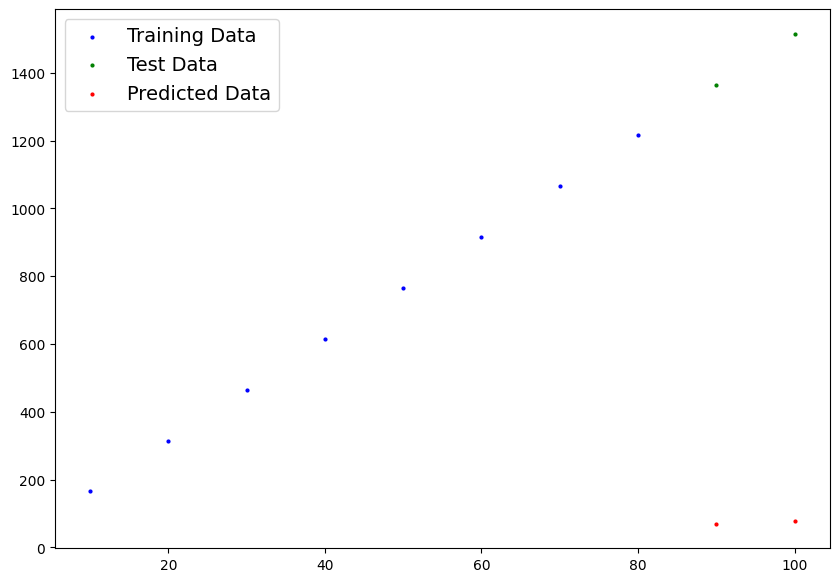

In [ ]:
#visualize new prediciton from model_2
data_plot(predictions=y_pred_2)

In [ ]:
#loss
loss_fun = nn.L1Loss()#MAE
#optimzier
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)  #lr (0,1)

In [ ]:
epoches =35
epoch_count =[]
train_loss_count=[]
test_loss_count=[]
for epoch in range(epoches):
  epoch_count.append(epoch)
  #training loop
  #1. forward pass
  model_2.train() # declaring model starts training
  y_hat_pred = model_2(X_train)

  #2. loss calculate
  train_loss = loss_fun(y_hat_pred, y_train)
  train_loss_count.append(train_loss)

  #3. zero grad
  optimizer.zero_grad()
  #4. loss backward
  train_loss.backward()
  #5. optimizer step
  optimizer.step()

  #test loop
  model_2.eval()
  with torch.inference_mode():
    #1. forward pass
    test_hat_pred = model_2(X_test)

    #2. test loss calculate
    test_loss = loss_fun(test_hat_pred, y_test)
    test_loss_count.append(test_loss)

    # print(model_1.state_dict())
    # if epoch % 10 ==0:
    print(f"Epoch:{epoch} | Train Loss:{train_loss} | Test Loss:{test_loss}")

Epoch:0 | Train Loss:654.7657470703125 | Test Loss:1323.77880859375
Epoch:1 | Train Loss:634.5057373046875 | Test Loss:1281.018798828125
Epoch:2 | Train Loss:614.2457885742188 | Test Loss:1238.2587890625
Epoch:3 | Train Loss:593.9857788085938 | Test Loss:1195.498779296875
Epoch:4 | Train Loss:573.7257690429688 | Test Loss:1152.73876953125
Epoch:5 | Train Loss:553.4657592773438 | Test Loss:1109.978759765625
Epoch:6 | Train Loss:533.2057495117188 | Test Loss:1067.21875
Epoch:7 | Train Loss:512.9457397460938 | Test Loss:1024.458740234375
Epoch:8 | Train Loss:492.68572998046875 | Test Loss:981.6987915039062
Epoch:9 | Train Loss:472.42572021484375 | Test Loss:938.9388427734375
Epoch:10 | Train Loss:452.1658020019531 | Test Loss:896.1788940429688
Epoch:11 | Train Loss:431.9057922363281 | Test Loss:853.4188842773438
Epoch:12 | Train Loss:411.6457824707031 | Test Loss:810.6588745117188
Epoch:13 | Train Loss:391.38580322265625 | Test Loss:767.89892578125
Epoch:14 | Train Loss:371.12579345703125

In [ ]:
# visiualizing test data on model_2
with torch.inference_mode():
  y_predicition_2 = model_2(X_test)
y_predicition_2

tensor([[1365.9656],
        [1517.6110]])

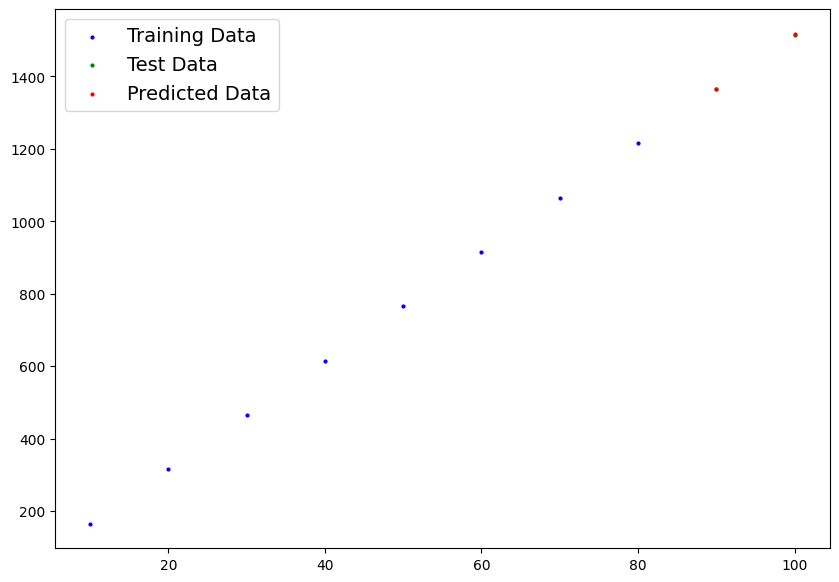

In [ ]:
data_plot(predictions=y_predicition_2)

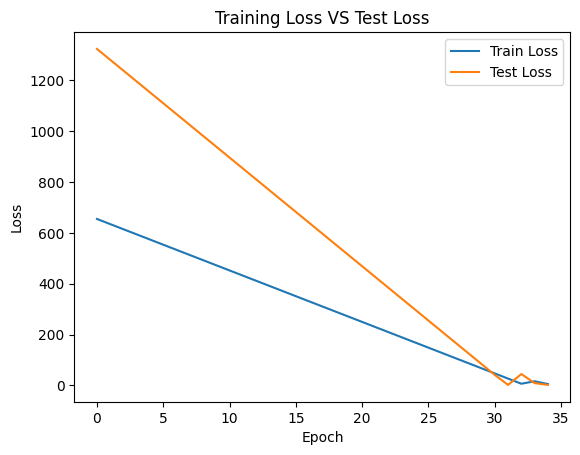

In [ ]:
plt.plot(epoch_count, torch.tensor(train_loss_count).detach().cpu().numpy(), label="Train Loss")
plt.plot(epoch_count, test_loss_count, label="Test Loss")
plt.title("Training Loss VS Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model_1.state_dict(), model_2.state_dict()

(OrderedDict([('weight', tensor([15.1783])), ('bias', tensor([0.3968]))]),
 OrderedDict([('lin_layer.weight', tensor([[15.1645]])),
              ('lin_layer.bias', tensor([1.1575]))]))